In [41]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("ModalShare.csv", index_col=["region", "Country", "City"])
df.head()

CityID   ObsID  year LastObservation  \
region Country  City                                                   
Europe Germany  Dippoldiswalde  M10191  ID0156  2008             YES   
       Slovenia Ljutomer        M10426  ID0382  2008             YES   
       Bulgaria Razlog          M10596  ID0508  2013             YES   
                Kavarna         M10364  ID0329  2013             YES   
                Balchik         M10048  ID0040  2013             YES   

                                   metro_names continent        subregion  \
region Country  City                                                        
Europe Germany  Dippoldiswalde  Dippoldiswalde    Europe   Western Europe   
       Slovenia Ljutomer              Ljutomer    Europe  Southern Europe   
       Bulgaria Razlog                  Razlog    Europe   Eastern Europe   
                Kavarna                Kavarna    Europe   Eastern Europe   
                Balchik                Balchik    Europe   Eastern Europe   

                               state_name state_abbr  population  ...  \
region Country  City                                              ...   
Europe Germany  Dippoldiswalde        NaN        NaN       10544  ...   
       Slovenia Ljutomer              NaN        NaN       11663  ...   
       Bulgaria Razlog                NaN        NaN       11960  ...   
                Kavarna               NaN        NaN       12669  ...   
                Balchik               NaN        NaN       12755  ...   

                                 Walking   Cycling   Active      Bus      Car  \
region Country  City                                                            
Europe Germany  Dippoldiswalde  0.240000  0.030000  0.27000  0.08000  0.65000   
       Slovenia Ljutomer        0.270000  0.090000  0.36000  0.29000  0.35000   
       Bulgaria Razlog          0.250000  0.050000  0.30000  0.22000  0.48000   
                Kavarna         0.300000  0.100000  0.40000  0.20000  0.40000   
                Balchik         0.287129  0.089109  0.37624  0.15842  0.46535   

                                        IncomeGroup  Unnamed: 21  \
region Country  City                                               
Europe Germany  Dippoldiswalde          High income          NaN   
       Slovenia Ljutomer                High income          NaN   
       Bulgaria Razlog          Upper middle income          NaN   
                Kavarna         Upper middle income          NaN   
                Balchik         Upper middle income          NaN   

                                                                  DataSource  \
region Country  City                                                           
Europe Germany  Dippoldiswalde  The European Platform on Mobility Management   
       Slovenia Ljutomer        The European Platform on Mobility Management   
       Bulgaria Razlog          The European Platform on Mobility Management   
                Kavarna         The European Platform on Mobility Management   
                Balchik         The European Platform on Mobility Management   

                                          DataLink        GDPPP  
region Country  City                                             
Europe Germany  Dippoldiswalde  https://epomm.eu/   51203.55447  
       Slovenia Ljutomer        https://epomm.eu/   29291.40062  
       Bulgaria Razlog          https://epomm.eu/   12221.49661  
                Kavarna         https://epomm.eu/   12221.49661  
                Balchik         https://epomm.eu/   12221.49661  

[5 rows x 22 columns]

In [7]:
df.isna().sum()

CityID               0
ObsID                0
year                 0
LastObservation      0
metro_names          0
continent            0
subregion            0
state_name         653
state_abbr         653
population           0
longitude            0
latitude             0
Walking             94
Cycling             94
Active               0
Bus                  0
Car                  0
IncomeGroup          0
Unnamed: 21        996
DataSource           0
DataLink             0
GDPPP                0
dtype: int64

In [8]:
df.shape

(996, 22)

In [29]:
%%timeit
# Check the number of unique cities recorded 
len(df["CityID"].unique())

37.3 μs ± 228 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [30]:
# Which 10 cities were surveyed the most times?
df.index.value_counts().head(10)

region  Country         City       
Europe  Austria         Graz           8
                        Vienna         6
        Germany         Leipzig        5
                        Erfurt         5
                        Dusseldorf     5
        Norway          Oslo           5
        Germany         Hannover       4
        Norway          Fredrikstad    4
        United Kingdom  London         4
        Germany         Karlsruhe      4
Name: count, dtype: int64

In [40]:
# Show ABC values for all G7 countries
G7 = ["Japan", "France", "Germany", "Italy", "Canada", "United States", "United Kingdom"]
idx = pd.IndexSlice
df.loc[idx[:,G7,:],["Active", "Bus", "Car"]]

Active      Bus      Car
region                Country        City                                    
East Asia and Pacific Japan          Osaka          0.26000  0.61000  0.13000
                                     Tokyo          0.37000  0.51000  0.12000
Europe                France         Beaujolais     0.22000  0.04000  0.74000
                                     Vienne         0.21000  0.05000  0.74000
                                     Annemasse      0.29000  0.05000  0.66000
...                                                     ...      ...      ...
                      United Kingdom West Midlands  0.12000  0.18000  0.70000
                                     London         0.28500  0.44500  0.27000
                                     London         0.27000  0.35000  0.38000
                                     London         0.26000  0.33000  0.41000
                                     London         0.25253  0.26263  0.48485

[630 rows x 3 columns]

<Axes: xlabel='Country'>

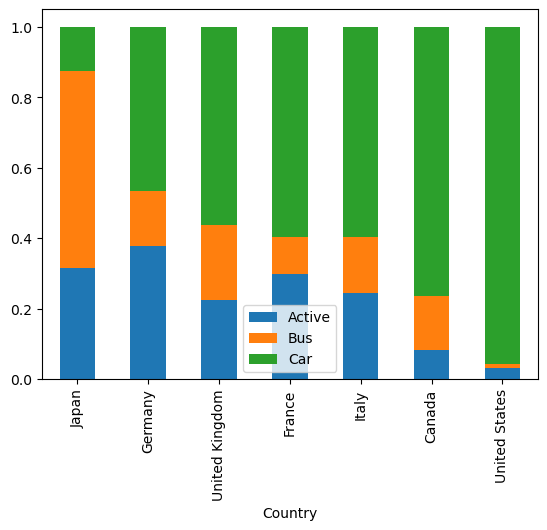

In [48]:
# Calculate the mean ABC values for each G7 country.
df.loc[:,G7,:].groupby("Country")[["Active", "Bus", "Car"]].agg("mean").sort_values("Car").plot.bar(stacked=True)

In [51]:
df.groupby("Country")[["Active", "Bus", "Car"]].agg(["mean", "median"]).sort_values(("Car", "median"), ascending=False).head(10)

Active                 Bus                 Car          
                   mean    median      mean    median      mean    median
Country                                                                  
United States  0.031399  0.025442  0.010876  0.006486  0.957731  0.966667
New Zealand    0.139783  0.101010  0.136277  0.121212  0.723941  0.818182
Australia      0.086549  0.059406  0.172051  0.140000  0.741400  0.810000
Canada         0.081678  0.070707  0.153980  0.140000  0.764342  0.787879
Ireland        0.205943  0.220000  0.115471  0.070000  0.678586  0.710000
South Africa   0.090000  0.090000  0.260000  0.260000  0.650000  0.650000
Norway         0.277962  0.280000  0.100437  0.080000  0.621601  0.650000
Portugal       0.197203  0.190960  0.198552  0.175000  0.604245  0.650000
Taiwan         0.134505  0.134505  0.249655  0.249655  0.615840  0.615840
Italy          0.245816  0.207920  0.157314  0.131310  0.596870  0.613860

In [55]:
df[["population", "Active", "Bus", "Car"]].corr()["population"]

population    1.000000
Active        0.046704
Bus           0.364077
Car          -0.220949
Name: population, dtype: float64

In [58]:
df.groupby("Country")[["Active", "Bus", "Car"]].agg("mean").stack().reset_index(level=1)

,level_1,0
Country,,
Albania,Active,0.730000
Albania,Bus,0.030000
Albania,Car,0.240000
Argentina,Active,0.340000
Argentina,Bus,0.343333
...,...,...
United States,Bus,0.010876
United States,Car,0.957731
Uruguay,Active,0.362000
